In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

plt.rcParams["font.size"] = 8.0
plt.rcParams["figure.figsize"] = (8, 3)

In [2]:
T = 500  # transmissivity
S = 1e-4
t = np.logspace(-2, 2, 101)
r = 20
Q = 1000

### Regular Theis well

In [3]:
ml = ttim.ModelMaq(kaq=25, z=[20, 0], Saq=S / 20, tmin=0.01, tmax=100)
w = ttim.DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
ml.solve()
h1 = ml.head(r, 0, t)

self.neq  0
No unknowns. Solution complete


### Hantush for several different $c$ values

In [4]:
clist = [1e2, 1e3, 1e4]
hhantush = np.zeros((len(clist), len(t)))
for i, c in enumerate(clist):
    ml = ttim.ModelMaq(
        kaq=25, z=[21, 20, 0], c=c, Saq=S / 20, topboundary="semi", tmin=0.01, tmax=100
    )
    w = ttim.DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
    ml.solve()
    hhantush[i] = ml.head(r, 0, t)[0]

self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete


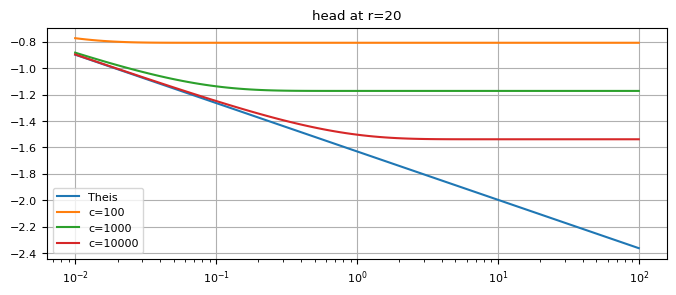

In [5]:
plt.semilogx(t, h1[0], label="Theis")
for i in range(3):
    plt.semilogx(t, hhantush[i], label="c=" + str(int(clist[i])))
plt.legend(loc="best")
plt.title("head at r=20")
plt.grid()

### Two-aquifer system with same $T$ in both layers and several different $c$ values

In [6]:
clist = [1e2, 1e3, 1e4]
htwolayer = np.zeros((len(clist), len(t)))
for i, c in enumerate(clist):
    ml = ttim.ModelMaq(
        kaq=[25, 25],
        z=[20, 0, -5, -25],
        c=c,
        Saq=S / 20,
        topboundary="conf",
        tmin=0.01,
        tmax=100,
    )
    w = ttim.DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
    ml.solve()
    htwolayer[i] = ml.head(r, 0, t)[0]

self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete


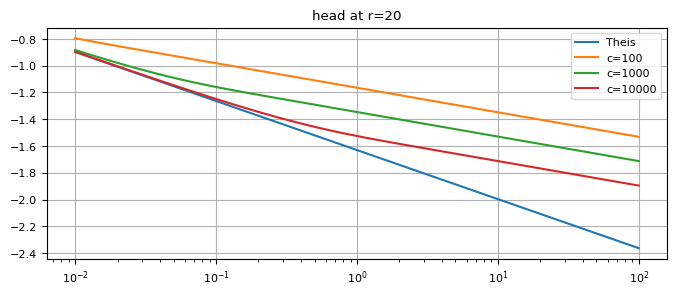

In [7]:
plt.semilogx(t, h1[0], label="Theis")
for i in range(3):
    plt.semilogx(t, htwolayer[i], label="c=" + str(int(clist[i])))
plt.legend(loc="best")
plt.title("head at r=20")
plt.grid()

### Model that starts at $t=10$ days

In [8]:
ml = ttim.ModelMaq(kaq=25, z=[20, 0], Saq=S / 20, tmin=0.01, tmax=100, tstart=10)
w = ttim.DischargeWell(ml, tsandQ=[(10, Q)], rw=1e-5)
ml.solve()
ht10 = ml.head(r, 0, t)

self.neq  0
No unknowns. Solution complete


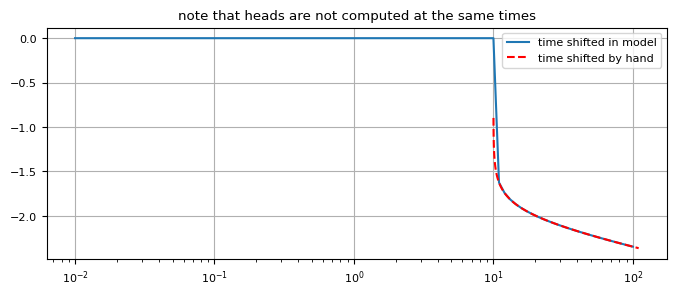

In [9]:
plt.semilogx(t, ht10[0], label="time shifted in model")
plt.semilogx(t + 10, h1[0], "r--", label="time shifted by hand")
plt.legend(loc="best")
plt.title("note that heads are not computed at the same times")
plt.grid()

### Well with entry resistance

In [10]:
k = 25  # m/d
H = 20  # m
Ss = 1e-4 / H  # m^(-1)
rw = 0.3  # m
res = 0.1  # d
Q = 500  # m^3/d
ml = ttim.Model3D(kaq=k, z=np.linspace(H, 0, 6), Saq=Ss, tmin=0.001, tmax=10)
w = ttim.Well(ml, tsandQ=[(0, Q)], rw=rw, res=res, layers=[0, 1, 2])
ml.solve()

self.neq  3
solution complete


In [11]:
hin = w.headinside(t=2)[:, 0]
hout = ml.head(rw, 0, t=2, layers=[0, 1, 2])[:, 0]
print("head inside well at t=2:     ", hin)
print("head just outside well at t=2", hout)

head inside well at t=2:      [-4.18893377 -4.18893379 -4.18893391]
head just outside well at t=2 [-2.01308248 -1.99455565 -1.92770747]


In [12]:
print("discharge of screens at t=2", w.discharge(2)[:, 0])
Qcheck = 2 * np.pi * rw * ml.aq.Haq[:3] * (hout - hin) / res
print("discharge from bc at t=2:  ", Qcheck)

discharge of screens at t=2 [164.05532251 165.45221423 170.49245686]
discharge from bc at t=2:   [164.05532251 165.45221423 170.49245686]


### Well with different entry resistance per layer

In [13]:
k = 25  # m/d
H = 20  # m
Ss = 1e-4 / H  # m^(-1)
rw = 0.3  # m
res = [0.05, 0.1, 0.15]  # d
Q = 500  # m^3/d
ml = ttim.Model3D(kaq=k, z=np.linspace(H, 0, 6), Saq=Ss, tmin=0.001, tmax=10)
w = ttim.Well(ml, tsandQ=[(0, Q)], rw=rw, res=res, layers=[0, 1, 2])
ml.solve()

self.neq  3
solution complete


In [14]:
hin = w.headinside(t=2)[:, 0]
hout = ml.head(rw, 0, t=2, layers=[0, 1, 2])[:, 0]
print("head inside well at t=2:     ", hin)
print("head just outside well at t=2", hout)

head inside well at t=2:      [-3.95216562 -3.95216616 -3.95216656]
head just outside well at t=2 [-2.4227822  -1.93402808 -1.62034004]


In [15]:
print("discharge of screens at t=2", w.discharge(2)[:, 0])
Qcheck = 2 * np.pi * rw * ml.aq.Haq[:3] * (hout - hin) / res
print("discharge from bc at t=2:  ", Qcheck)

discharge of screens at t=2 [230.62558719 152.16402612 117.21038491]
discharge from bc at t=2:   [230.62558719 152.16402612 117.21038491]
